# KEY FACIAL POINTS DETECTION AND FACE RECOGNITION USING DLIB

#### Key Facial Points Detection has many applications in the field of IOT and is widely used in many Face Applications related task such as Face Recognition, Drowsiness Detection and many more.

#### One of the application which is Face Recognition is implemented in this notebook. 

![IMAGE](https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/ezgif-3-a5b341d587dd.gif)

### DATASET: [Source of Data](https://www.kaggle.com/c/facial-keypoints-detection/data)

#### The Dataset contains a csv file which includes co-ordinates of Key Facial Points and the last column contains pixel values of the image.The architecture of the model used in this Notebook is inspired by ResNet architectures.

# Downloading the Dataset

In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/KeyFacialPoints.zip"
!unzip -o KeyFacialPoints.zip -d data
!rm KeyFacialPoints.zip

--2020-10-07 11:09:26--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/KeyFacialPoints.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.56
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21227495 (20M) [application/x-zip-compressed]
Saving to: ‘KeyFacialPoints.zip’

KeyFacialPoints.zip 100%[===================>]  20.24M   106MB/s    in 0.2s    

2020-10-07 11:09:26 (106 MB/s) - ‘KeyFacialPoints.zip’ saved [21227495/21227495]

Archive:  KeyFacialPoints.zip
  inflating: data/KeyFacialPoints.csv  


# IMPORT LIBRARIES/DATASETS AND PERFORM PRELIMINARY DATA PROCESSING

In [2]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers


In [3]:
# load the data
facialpoints_df = pd.read_csv('data/KeyFacialPoints.csv')

In [4]:
facialpoints_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
#Extracting Insights from the data
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [6]:
# Since values for the image is given as space separated string, we will need to separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [7]:
# Let's obtain the shape of the resized image
facialpoints_df['Image'][1].shape

(96, 96)

In [8]:
#Checking for NULL values
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

# VISUALIZING IMAGE

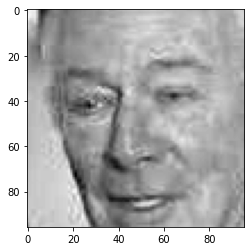

In [9]:
# Plot a random image from the dataset along with facial keypoints. 
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')


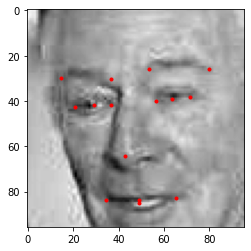

In [10]:
# Plotting the co-ordinates of key facial points available in the data-frame upon the image

plt.figure()
plt.imshow(facialpoints_df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'r.')


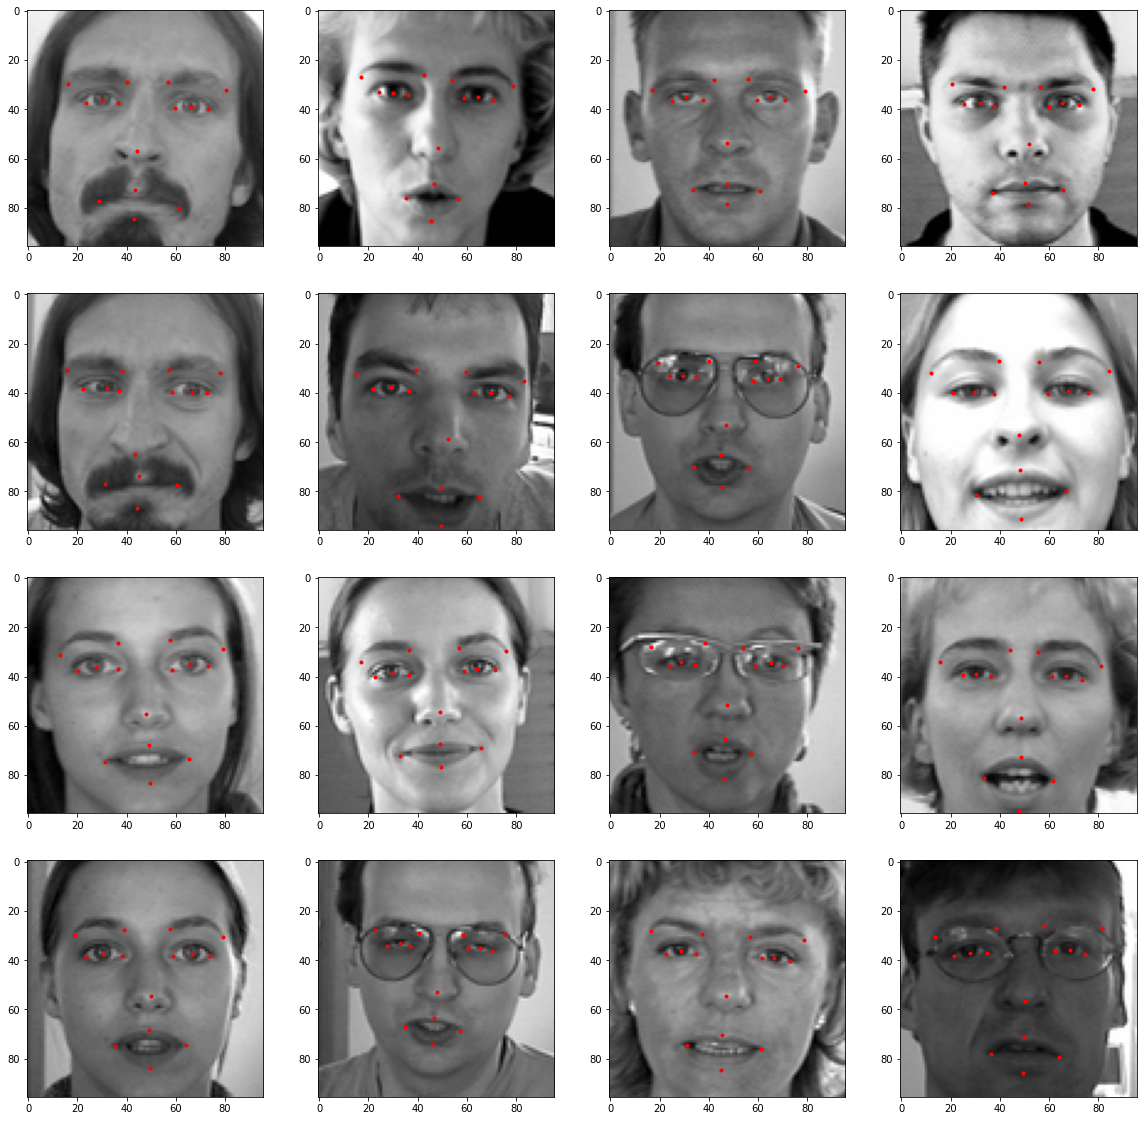

In [11]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'r.')
    

# PERFORMING IMAGE AUGMENTATION TO INCREASE THE AMOUNT OF DATA

In [12]:
# Create a new copy of the dataframe
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)

In [13]:
# obtain the header of the DataFrame (names of columns) 

columns = facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [14]:
# Take a look at the pixel values of a sample image and see if it makes sense!
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

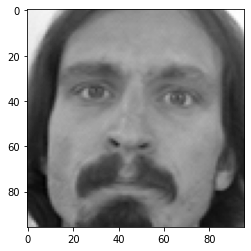

In [15]:
# plot the sample image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')

In [16]:
# Now Let's flip the image column horizontally 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [17]:
# Now take a look at the flipped image and do a sanity check!
# Notice that the values of pixels are now flipped
facialpoints_df_copy['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

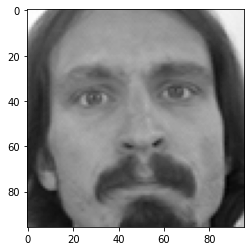

In [18]:
# Notice that the image is flipped now
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')

In [19]:
# Since we are flipping the images horizontally, y coordinate values would be the same
# X coordinate values only would need to change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
    if i%2 == 0:
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

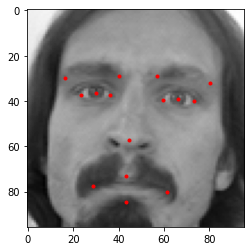

In [20]:
# View the Original image
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'r.')

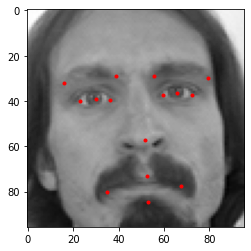

In [21]:
# View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'r.')

In [22]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))

In [23]:
facialpoints_df_augmented.shape

(4280, 31)

In [24]:
# Let's try to perform another image augmentation by randomly increasing images brightness
import random

facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

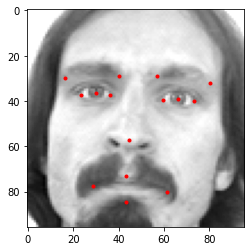

In [25]:
# Let's view image with increased brightness

plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'r.')

# PERFORMING NORMALIZATION AND TRAINING DATA PREPARATION

In [26]:
# Obtain the value of 'Images' which is in 31st column of DataFrame and normalize it
img = facialpoints_df_augmented[:, 30]
img = img/255.

# Create an empty array of shape (6420, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the normalized images list and add image values to the empty array 
# Note that we need to expand it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [27]:
# Obtain the values of key face points coordinates, which are to used as target to train the model
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [28]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [29]:
X_train.shape

(5778, 96, 96, 1)

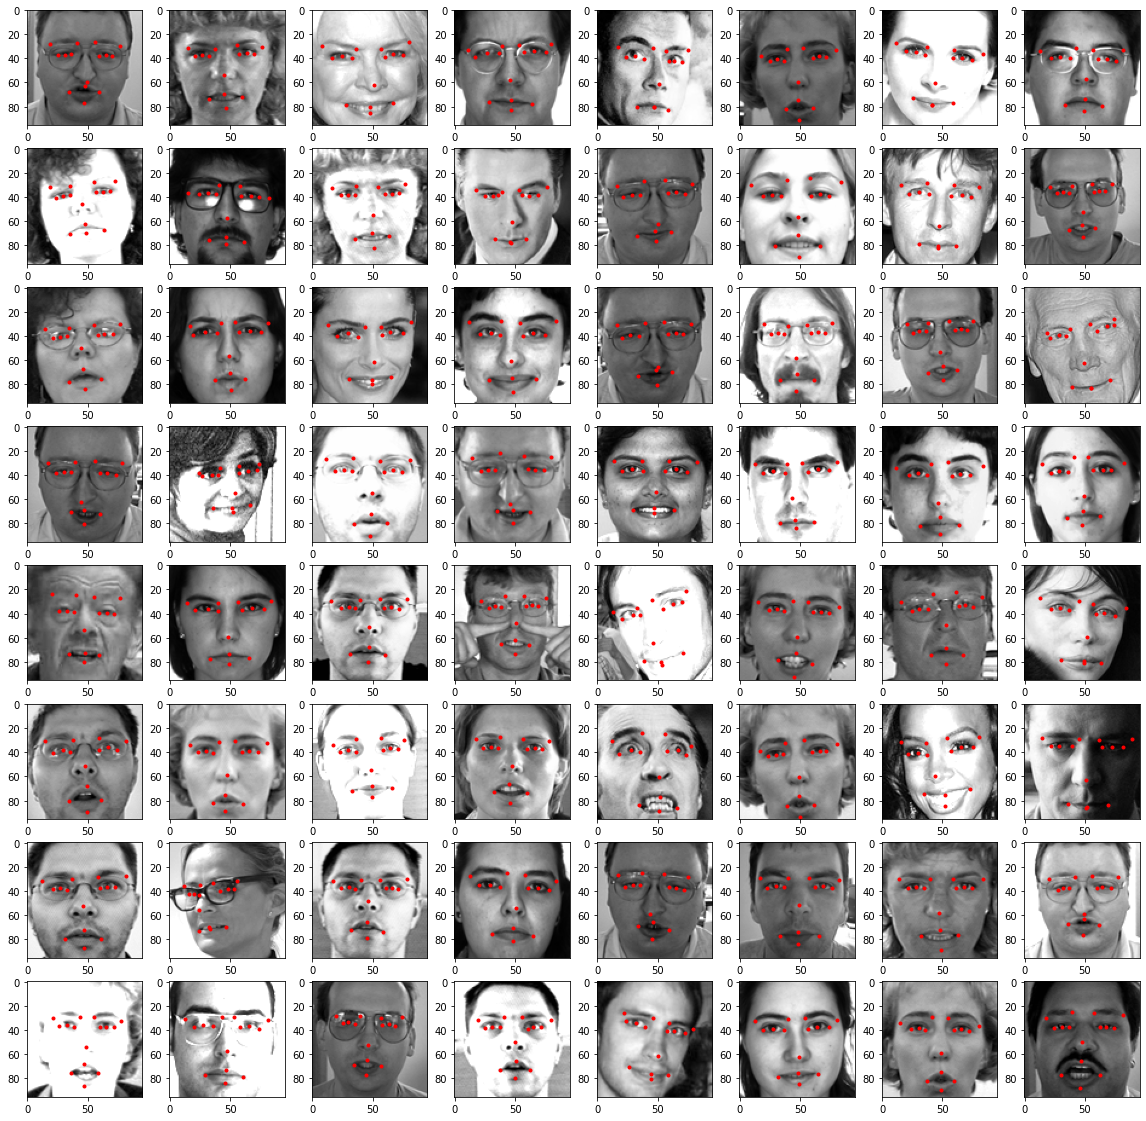

In [30]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'r.')
    

# BUILDING A CUSTOM RESIDUAL NEURAL NETWORK ARCHITECTURE

In [31]:
def res_block(X, filter, stage):
    
      # CONVOLUTIONAL BLOCK
    X_copy = X
    f1 , f2, f3 = filter

      # Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

      # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

      # Add data from main and short paths
    X = Add()([X,X_copy])
    X = Activation('relu')(X)



      # IDENTITY BLOCK 1
    X_copy = X

      # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

      # Add both paths together (Note that we feed the original input as is hence the name "identity")
    X = Add()([X,X_copy])
    X = Activation('relu')(X)



    # IDENTITY BLOCK 2
    X_copy = X
     # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

      # Add both paths together (Note that we feed the original input as is hence the name "identity")
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [32]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

# COMPILING AND TRAINING DEEP LEARNING MODEL

In [33]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [34]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "model.h5", verbose = 2, save_best_only = True)

In [35]:
history = model.fit(X_train, y_train, batch_size = 256, epochs= 150, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/150
22/22 [==============================] - ETA: 0s - loss: 373.2959 - accuracy: 0.3285
Epoch 00001: val_loss improved from inf to 2109.76465, saving model to model.h5
22/22 [==============================] - 46s 2s/step - loss: 373.2959 - accuracy: 0.3285 - val_loss: 2109.7646 - val_accuracy: 0.7336
Epoch 2/150
22/22 [==============================] - ETA: 0s - loss: 141.0155 - accuracy: 0.5759
Epoch 00002: val_loss improved from 2109.76465 to 1606.04968, saving model to model.h5
22/22 [==============================] - 46s 2s/step - loss: 141.0155 - accuracy: 0.5759 - val_loss: 1606.0497 - val_accuracy: 0.7336
Epoch 3/150
22/22 [==============================] - ETA: 0s - loss: 92.7870 - accuracy: 0.6085
Epoch 00003: val_loss improved from 1606.04968 to 1347.27234, saving model to model.h5
22/22 [==============================] - 47s 2s/step - loss: 92.7870 - accuracy: 0.6085 - val_loss: 1347.2723 - val_accuracy: 0.7336
Epoch 4/150
22/22 [==============================] - ET

# ASSESSING TRAINED MODEL PERFORMANCE

In [58]:
# Loading trained model

new_model = tf.keras.models.load_model('model.h5')

new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [37]:
# Getting the model history keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

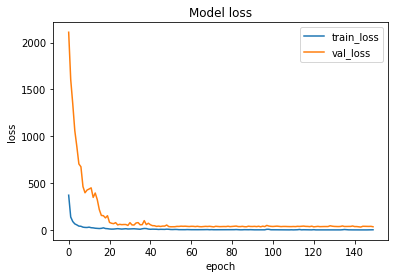

In [38]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [39]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [40]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 7.074997099211944


In [41]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,59.903053,35.336075,30.770691,37.483280,54.882153,36.754498,65.662956,35.649025,37.294506,38.063217,...,54.318302,54.831600,59.876766,74.865211,37.741844,77.160652,51.077469,74.326874,51.208164,76.060928
1,68.189735,37.082047,29.115215,39.318729,59.498676,38.974442,77.897430,37.323940,38.170338,40.181526,...,49.754940,60.778172,73.187782,70.957146,28.651382,73.509399,50.788937,75.416901,51.359772,82.221581
2,64.609238,36.519073,29.527073,39.294823,58.575527,37.410957,70.758369,36.816883,35.579651,38.991005,...,46.585865,47.810158,63.023540,72.203690,35.747086,74.735191,48.356293,64.481102,49.221729,80.231453
3,59.705898,33.489632,35.207603,34.510254,55.340240,34.256081,64.990143,34.170876,40.595329,34.806915,...,53.757225,47.926083,60.359234,64.742966,39.026981,65.786911,51.434155,61.980801,51.468334,68.551308
4,66.568939,36.181335,30.672859,36.922859,60.088806,37.202702,73.175407,36.589169,37.198040,37.717270,...,48.196812,58.914265,64.690369,76.208908,33.068321,77.074364,48.644093,72.178421,48.679893,86.025665


# VISUALIZING THE RESULTS

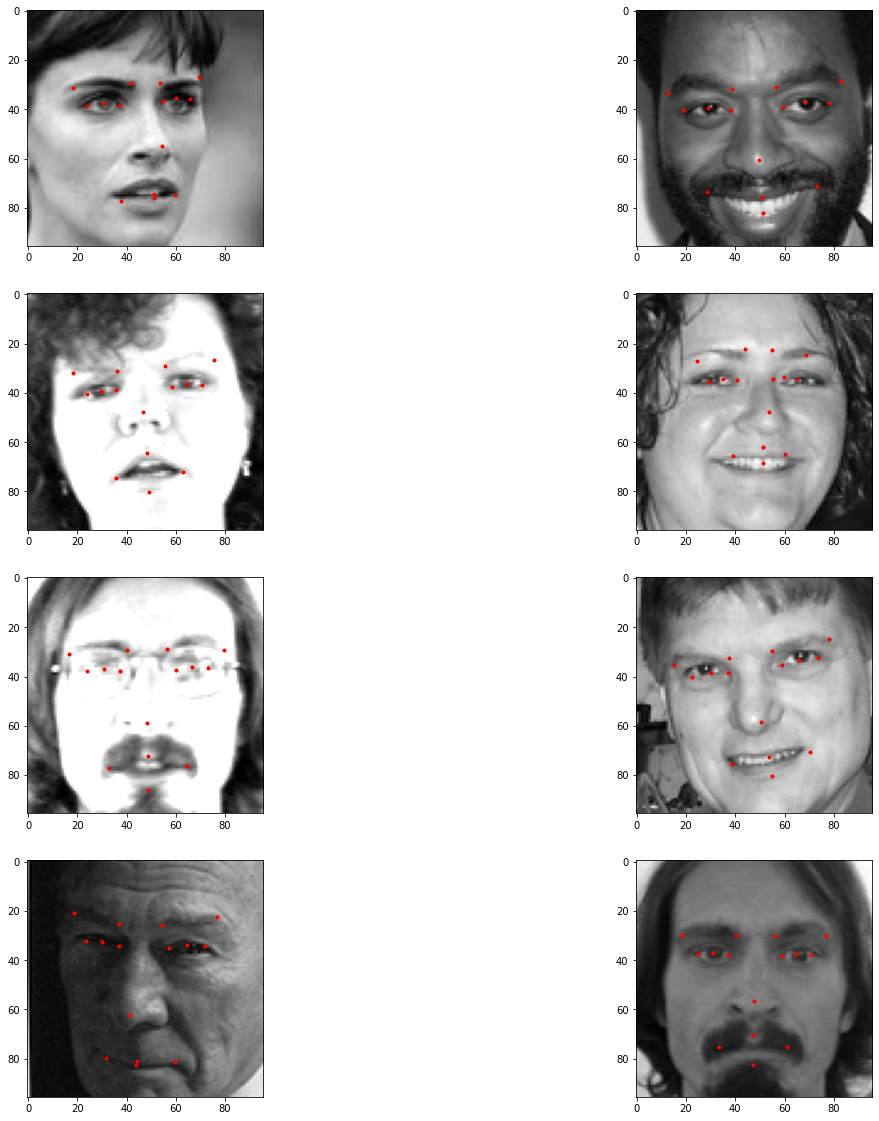

In [42]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'r.')

# COMPILING THE MODEL USING DEEPC

In [43]:
!deepCC model.h5

reading [keras model] from 'model.h5'
Saved 'model.onnx'
reading onnx model from file  model.onnx
Model info:
  ir_vesion :  4 
  doc       : 
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): graph-node res_3_identity_2_b's attribute auto_pad has no meaningful data.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator Batc

# FACE RECOGNITION MODEL USING DLIB LIBRARY

### DLIB is a library which conatains models which are trained to find KEY FACIAL POINTS using a very large dataset and with a more complex Neural Network Architecture.It has been trained for a sufficiently long time and it can be used for various Face Applications 

In [44]:
#Import dlib library
import dlib
dlib.__version__

'19.20.0'

In [45]:
#Initializing various modules which we will be using for face recognition
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
detec_model = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [46]:
#Loading images of Celebs
downy1_img = dlib.load_rgb_image("downey1.jpg")
downy2_img = dlib.load_rgb_image("downy2.jpg")
chris_img = dlib.load_rgb_image("Chris.jpg")

In [47]:
#Detecting face using Dlib
img1_detected = detector(downy1_img)
img2_detected = detector(downy2_img)
img3_detected = detector(chris_img)

In [48]:
#Determinig the key facial landmarks
img1_shape = sp(downy1_img, img1_detected[0])
img2_shape = sp(downy2_img, img2_detected[0])
img3_shape = sp(chris_img, img3_detected[0])

In [49]:
#Aligning the face for better results using Dlib
img1_aligned = dlib.get_face_chip(downy1_img, img1_shape)
img2_aligned = dlib.get_face_chip(downy2_img, img2_shape)
img3_aligned = dlib.get_face_chip(chris_img, img3_shape)

In [50]:
#Converting the aligned image in the form of vectors
img1_rep = detec_model.compute_face_descriptor(img1_aligned)
img2_rep = detec_model.compute_face_descriptor(img2_aligned)
img3_rep = detec_model.compute_face_descriptor(img3_aligned)

In [51]:
#Function to find euclidean distance between source points and target poinst which will be later used for comaprisons between different faces 
def findeuclidean(source_rep, test_rep):
    dist = source_rep - test_rep
    dist = np.sum(np.multiply(dist, dist))
    dist = np.sqrt(dist)
    return dist

In [52]:
#Function to check whether the target image matches with the source image
#We will be comparing the key facial points co-ordinates by calculating their euclidean distance
#If the distance is less than a threshold value then the images are of same person otherwise different persons
def check_result(img1_rep, img2_rep):
    threshold = 0.6
    distance = findeuclidean(img1_rep, img2_rep)
    if(distance < threshold):
        print("Both presonalities are same!")
    else:
        print("Both personalities are different!")

# ACCESSING THE PERFORMANCE OF THE MODEL

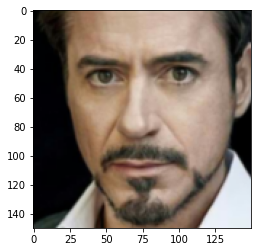

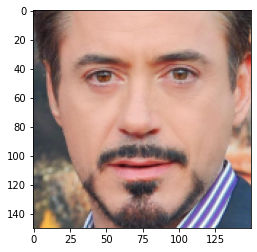

In [53]:
plt.imshow(img1_aligned)
plt.show()
plt.imshow(img2_aligned)
plt.show()
img1_rep = np.array(img1_rep)
img2_rep = np.array(img2_rep)

In [54]:
check_result(img1_rep, img2_rep)

Both presonalities are same!


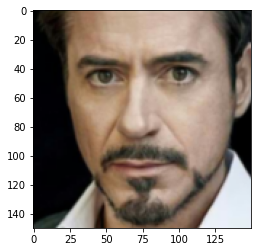

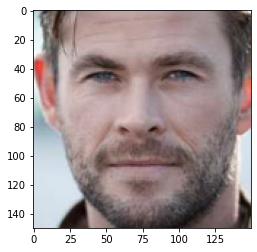

In [55]:
plt.imshow(img1_aligned)
plt.show()
plt.imshow(img3_aligned)
plt.show()
img1_rep = np.array(img1_rep)
img3_rep = np.array(img3_rep)

In [56]:
check_result(img1_rep, img3_rep)

Both personalities are different!
